#### create open with link

<a href="https://colab.research.google.com/github/Daviedavie100/freeCodeCamp/blob/main/boilerplate_sea_level_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### install scipy

In [1]:
#%conda install scipy
#%conda install statsmodels

In [2]:
#load imports
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import statsmodels.api as sm

In [3]:
# read the dataset
df=pd.read_csv('C:/Users/Davie/Documents/GitHub/freeCodeCamp/data/epa-sea-level.csv')
df.head(10)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
5,1885,0.531496,-0.330709,1.393701,NaN
6,1886,0.437008,-0.381890,1.255906,NaN
7,1887,0.216535,-0.602362,1.035433,NaN
8,1888,0.299213,-0.519685,1.118110,NaN
9,1889,0.362205,-0.456693,1.181102,NaN


In [4]:
#define data for x axis
x=df['Year']
x

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
129    2009
130    2010
131    2011
132    2012
133    2013
Name: Year, Length: 134, dtype: int64

In [5]:
#define data for y axis
y = df['CSIRO Adjusted Sea Level']
y

0      0.000000
1      0.220472
2     -0.440945
3     -0.232283
4      0.590551
         ...   
129    8.586614
130    8.901575
131    8.964567
132    9.326772
133    8.980315
Name: CSIRO Adjusted Sea Level, Length: 134, dtype: float64

#### Simple scatter plot

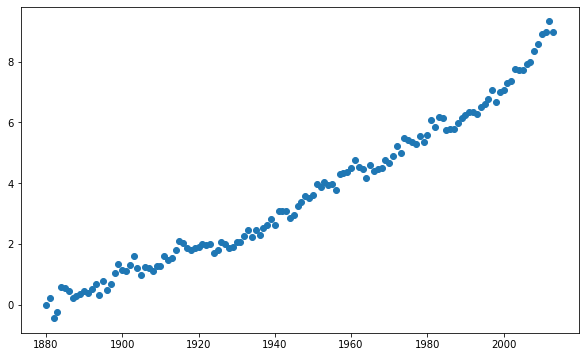

In [6]:
# Create scatter plot
'''Use matplotlib to create a scatter plot using the Year column as the x-axis and the 
CSIRO Adjusted Sea Level column as the y-axix.'''

fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(x, y)
plt.show();

#### Scatter plot with line of best fit 
- predictive model for sea level upto the year 2050

In [7]:
#define data for x axis
x_pred = pd.Series([i for i in range (1880, 2050)])
x_pred

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
165    2045
166    2046
167    2047
168    2048
169    2049
Length: 170, dtype: int64

In [8]:
# Get slope, intercept from linregress() to plot y' = intercept + slope*x
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

#Create first line of best fit
y_pred=intercept + slope*x_pred
y_pred

0      -0.542124
1      -0.479079
2      -0.416035
3      -0.352990
4      -0.289946
         ...    
165     9.860232
166     9.923277
167     9.986322
168    10.049366
169    10.112411
Length: 170, dtype: float64

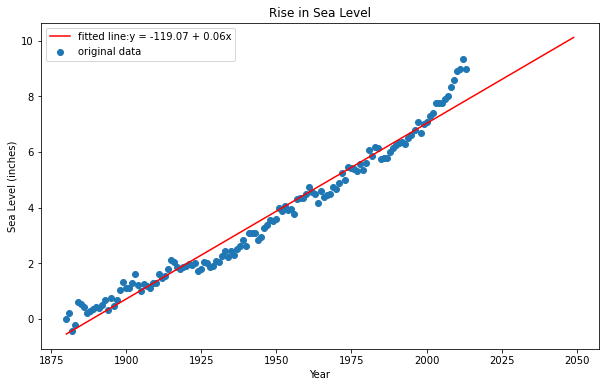

In [9]:
# Create scatter plot
'''Use matplotlib to create a scatter plot using the Year column as the x-axis and the 
CSIRO Adjusted Sea Level column as the y-axix.'''

fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(x, y, label='original data')

label='fitted line:''y = ' + '{:.2f}'.format(intercept) + ' + {:.2f}'.format(slope) + 'x'
# Plot linear regression line.
plt.plot(x_pred,y_pred, color="r", label=label)

plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.legend()
plt.show();

#### Create second plot
- Get slope, intercept from linregress() to plot y' = intercept + slope*x
- (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

In [10]:
 # Create second line of best fit
df_2000 = df.loc[df['Year'] >= 2000]
df_2000

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


In [11]:
x_2000 = df_2000['Year']
x_2000

120    2000
121    2001
122    2002
123    2003
124    2004
125    2005
126    2006
127    2007
128    2008
129    2009
130    2010
131    2011
132    2012
133    2013
Name: Year, dtype: int64

In [12]:
y_2000 = df_2000['CSIRO Adjusted Sea Level']
y_2000

120    7.062992
121    7.287402
122    7.381890
123    7.759843
124    7.740157
125    7.744094
126    7.917323
127    7.996063
128    8.350394
129    8.586614
130    8.901575
131    8.964567
132    9.326772
133    8.980315
Name: CSIRO Adjusted Sea Level, dtype: float64

In [13]:
res_2000 = linregress(x_2000, y_2000)
res_2000

LinregressResult(slope=0.16642727333186808, intercept=-325.79346680596467, rvalue=0.976287571614062, pvalue=2.4388064141616947e-09, stderr=0.010652933111541106)

In [14]:
x_pred2000 = pd.Series([i for i in range(2000, 2051)])
x_pred2000

0     2000
1     2001
2     2002
3     2003
4     2004
5     2005
6     2006
7     2007
8     2008
9     2009
10    2010
11    2011
12    2012
13    2013
14    2014
15    2015
16    2016
17    2017
18    2018
19    2019
20    2020
21    2021
22    2022
23    2023
24    2024
25    2025
26    2026
27    2027
28    2028
29    2029
30    2030
31    2031
32    2032
33    2033
34    2034
35    2035
36    2036
37    2037
38    2038
39    2039
40    2040
41    2041
42    2042
43    2043
44    2044
45    2045
46    2046
47    2047
48    2048
49    2049
50    2050
dtype: int64

In [15]:
y_pred2000 = res_2000.intercept + res_2000.slope * x_pred2000
y_pred2000

0      7.061080
1      7.227507
2      7.393934
3      7.560362
4      7.726789
5      7.893216
6      8.059643
7      8.226071
8      8.392498
9      8.558925
10     8.725353
11     8.891780
12     9.058207
13     9.224634
14     9.391062
15     9.557489
16     9.723916
17     9.890344
18    10.056771
19    10.223198
20    10.389625
21    10.556053
22    10.722480
23    10.888907
24    11.055334
25    11.221762
26    11.388189
27    11.554616
28    11.721044
29    11.887471
30    12.053898
31    12.220325
32    12.386753
33    12.553180
34    12.719607
35    12.886034
36    13.052462
37    13.218889
38    13.385316
39    13.551744
40    13.718171
41    13.884598
42    14.051025
43    14.217453
44    14.383880
45    14.550307
46    14.716734
47    14.883162
48    15.049589
49    15.216016
50    15.382444
dtype: float64

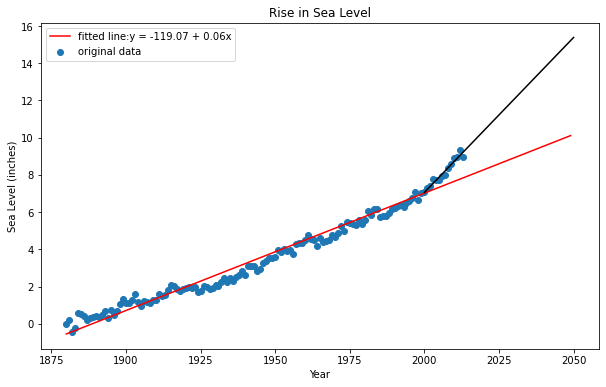

In [16]:
# Create scatter plot
'''Use matplotlib to create a scatter plot using the Year column as the x-axis and the 
CSIRO Adjusted Sea Level column as the y-axix.'''

fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(x, y, label='original data')

label='fitted line:''y = ' + '{:.2f}'.format(intercept) + ' + {:.2f}'.format(slope) + 'x'
# Plot linear regression line.
plt.plot(x_pred,y_pred, color="red", label=label)

# Create second line of best fit
plt.plot(x_pred2000, y_pred2000, color="black")

plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.legend()
plt.show();

#### function 

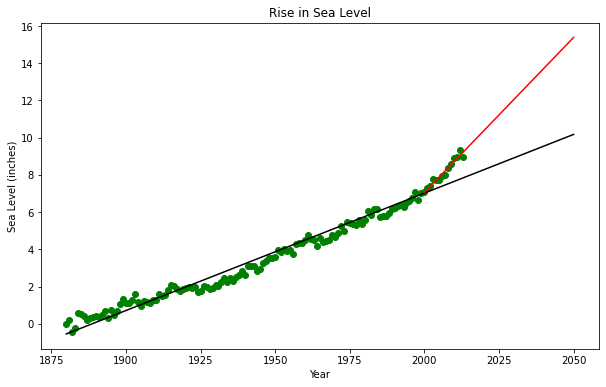

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def draw_plot():
  # Read data from file
  df = pd.read_csv('C:/Users/Davie/Documents/GitHub/freeCodeCamp/data/epa-sea-level.csv')

  #define data
  x = df['Year']
  y = df['CSIRO Adjusted Sea Level']

  # Create scatter plot
  fig, ax = plt.subplots(figsize=(10,6))
  plt.scatter(x, y, color='green')

  # Get slope, intercept from linregress
  res = linregress(x, y)

  # Create first line of best fit
  x_pred = pd.Series([i for i in range(1880, 2051)])
  y_pred = res.intercept + res.slope * x_pred
  plt.plot(x_pred, y_pred, color="black")

  # Create second line of best fit
  df_2000 = df.loc[df['Year'] >= 2000]
  x_2000 = df_2000['Year']
  y_2000 = df_2000['CSIRO Adjusted Sea Level']
  res_2000 = linregress(x_2000, y_2000)
  x_pred2000 = pd.Series([i for i in range(2000, 2051)])
  y_pred2000 = res_2000.intercept + res_2000.slope * x_pred2000
  plt.plot(x_pred2000, y_pred2000, color="red")

  # Add labels and title
  plt.title('Rise in Sea Level')
  plt.xlabel('Year')
  plt.ylabel('Sea Level (inches)')

  # Save plot and return data for testing (DO NOT MODIFY)
  plt.savefig('sea_level_plot.png')
  return plt.gca()
draw_plot();

##%conda update -n base -c defaults conda